In [1]:

import numpy as np
import segyio
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import Button, HBox, VBox

import matplotlib
import warnings
warnings.filterwarnings('ignore')
import glob

from mpl_toolkits.mplot3d import Axes3D
from skimage.transform import rescale 
from mayavi import mlab
import os
from shutil import copyfile
from scipy.fftpack.helper import next_fast_len
#from scipy import ndimage

import Functions

#plt.rcParams["figure.figsize"] = (10,5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#%matplotlib inline
%matplotlib notebook
#sourcefile='D:/small.sgy'
#sourcefile='D:/Vawn.SGY'
sourcefile="C:/Users/koushb/OneDrive - Husky Energy/ML/ML_S_Int/For GoogleML data/data/Cropped SGY/DV.sgy"




#filter_files=['None']


#for file in glob.glob(".\\filters\\*.npz"):
#    filter_files.append(file)

 



 

In [2]:
src=segyio.open(sourcefile)


vol=[]
for inline in src.ilines:
    vol.append(np.array(src.iline[inline]).T)
vol=np.array(vol)
vol=np.swapaxes(vol,0,1)
vol=np.swapaxes(vol,0,2)

volumes=[vol]

ilines=src.ilines
xlines=src.xlines
TimeSamples=src.samples

src.close()

#np_s=readsegy(sourcefile)

il_min=ilines[0]
il_max=ilines[-1]

xl_min=xlines[0]
xl_max=xlines[-1]


z_min=TimeSamples[0]
z_max=TimeSamples[-1]


print(vol.min(),vol.max())
print(vol.shape)



fft_lst=[]
a=0
for i in TimeSamples:
    b=next_fast_len(int(i))
    if a!=b:
        fft_lst.append(b)
        a=b



-41503.023 47900.133
(376, 241, 3001)


In [3]:
#print(TimeSamples,fft_lst)
#fft_lst[-1]


In [4]:
def i_x_z_plot(t,title,clear=False,extent=[0,100,0,300],aspr=1):
    cmap=colormap.value
    s=resizefactor
    if s>1:
        t=rescale(t.copy(), 1/s, anti_aliasing=False).copy()
    if attribute.value != "None" and attribute.disabled==False:
        t=Functions.calc_att(t.copy(),TimeSamples,attribute.value,att_par.value)
    if auto_scale_min.value:
        vmin.value=int(t.min())-1       
    if auto_scale_max.value:
        vmax.value=int(t.max())+1
    if clear:
        plt.clf()
        

    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value,extent=extent)
    plt.axes().set_aspect(aspr)
    plt.title(title)

    if clear and showlegend.value:
        plt.colorbar()
    
def il_plot(clear=False):
    global volumes
    inline_ind=il_Slider.index
    vol=volumes[select_realize.index]
    t=vol[:,inline_ind,:].T
    title='in line: '+str(il_Slider.value)
    i_x_z_plot(t,title,clear,extent=[xl_min,xl_max,z_max,z_min],aspr=1/vert_ex)
       
def xl_plot(clear=False):
    global volumes
    xline_ind=xl_Slider.index    
    vol=volumes[select_realize.index]
    t=vol[xline_ind,:,:].T
    title='cross line: '+str(xl_Slider.value)
    i_x_z_plot(t,title,clear,extent=[il_min,il_max,z_max,z_min],aspr=1/vert_ex)
    
def z_plot(clear=False):
    global volumes
    z_ind=z_Slider.index    
    vol=volumes[select_realize.index]
    t=vol[:,:,z_ind].T
    title='Time Slice: '+str(z_Slider.value)
    i_x_z_plot(t,title,clear,extent=[xl_min,xl_max,il_min,il_max],aspr=1)
    
    

def t_plot():
    global volumes
    inline_ind=il_Slider.index
    xline_ind=xl_Slider.index    
    cmap=colormap.value
    vol=volumes[select_realize.index]
    trace=vol[inline_ind,xline_ind,:].copy()
    

    if attribute.value != "None":
        trace=Functions.calc_att(trace,TimeSamples,attribute.value,att_par.value).copy()
        
        
    
    if auto_scale_min.value:
        vmin.value=int(trace.min())-1
    if auto_scale_max.value:
        vmax.value=int(trace.max())+1
    
    plt.clf()
    plt.plot(trace,TimeSamples)    
    plt.xlim(vmin.value,vmax.value)
    plt.ylim(TimeSamples[-1],TimeSamples[0])
    plt.axes().set_aspect('auto')     
    plt.title('in line: '+str(il_Slider.value)+', x line: '+str(xl_Slider.value))


def plot_3D(clear=False):#inline,xline,z,
    global volumes
    
    s=resizefactor
    inline_ind=il_Slider.index
    xline_ind=xl_Slider.index  
    z_ind=z_Slider.index   
    
    cmap=colormap.value

    vol=volumes[select_realize.index]
    grid = mlab.pipeline.scalar_field(vol)
    grid.spacing = [1, 1.0, 1/s]

    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='x_axes',
                                slice_index=inline_ind,
                                colormap=cmap
                            )
    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='y_axes',
                                slice_index=xline_ind,
                                colormap=cmap
                            )
    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='z_axes',
                                slice_index=z_ind,
                                colormap=cmap
                            )
    mlab.outline()
    mlab.show()

    
    
 
#https://gis.stackexchange.com/questions/200180/convert-and-plot-python-basemap-and-netcdf-file-in-utm-zone-45n/201155

In [5]:
graphtype=widgets.RadioButtons(options=['1D', '2D', '3D'],description='Type',value='2D',disabled=False)

select_realize=widgets.Dropdown(options=['original'],value='original',description='Select Seismic Volume',disabled=False,style={'description_width': 'initial'})
realizeit = widgets.Button(description="Realize")
realizename=widgets.Text(value='Realize 1',placeholder='Type something',description='Name:',disabled=False)
savetofile = widgets.Button(description="Save to File")

auto_scale_min=widgets.Checkbox(value=False,description='Auto',disabled=False,indent=False)
auto_scale_max=widgets.Checkbox(value=False,description='Auto',disabled=False,indent=False)
showlegend=widgets.Checkbox(value=False,description='Show Legend',disabled=False,indent=False)
il_Slider= widgets.SelectionSlider(options=ilines,description='Inline',continuous_update=False,step=1,style={'description_width': 'initial'})
xl_Slider= widgets.SelectionSlider(options=xlines,description='Xline',continuous_update=False,step=1,style={'description_width': 'initial'})
z_Slider = widgets.SelectionSlider(options=TimeSamples,description='Zline',continuous_update=False,step=1,style={'description_width': 'initial'})


vmin     = widgets.IntSlider(min=-70000, max=70000, value=-40000, description='Amp. Min',continuous_update=False,step=1,style={'description_width': 'initial'})
vmax     = widgets.IntSlider(min=-70000, max=70000, value=40000, description='Amp. Max',continuous_update=False,step=1,style={'description_width': 'initial'})
att_par  = widgets.SelectionSlider(options=range(360), value=0, description='Att. Par.',continuous_update=False,disabled=True)

maps = sorted(m for m in plt.cm.datad if not m.endswith("_r"))

colormap=widgets.Dropdown(options=maps,value='seismic',description='Colormap',disabled=False,)



attribute=widgets.Dropdown(options=['None', 'Phase Shift', 'Low Pass','High Pass','Edge Detection', 'CumulativeSum',\
                                    'FirstDerivative', 'InstantEnvelope', 'InstantQuadrature', 'InstantPhase',\
                                    'InstantFrequency','InstantCosPhase'],value='None',description='Attributes',disabled=False,)






In [6]:

tp=0

def plotem(clear=False):
    global tp
    if graphtype.value=='1D':
        t_plot()
        
    elif graphtype.value=='2D':
        
        if tp==1:
            il_plot(clear=clear)
        elif tp==2:
            xl_plot(clear=clear) 
        else:
            z_plot(clear=clear)
    else:
        #print('3D')
        plot_3D(clear=True)
        


        vmin     = widgets.IntSlider(min=-70000, max=70000, value=-40000, description='Amp. Min',continuous_update=False,step=1,style={'description_width': 'initial'})
        vmax     = widgets.IntSlider(min=-70000, max=70000, value=40000, description='Amp. Max',continuous_update=False,step=1,style={'description_width': 'initial'})
        att_par  = widgets.SelectionSlider(options=range(360), value=0, description='Att. Par.',continuous_update=False,disabled=True)

        

def on_value_change(change):  
    global tp
    #print(tp)
    if change['owner'].description=='Type':
        if graphtype.value=='1D':
            select_realize.disabled=False
            realizeit.disabled=False
            realizename.disabled=False
            savetofile.disabled=False
            auto_scale_min.disabled=False
            auto_scale_max.disabled=False
            showlegend.disabled=False
            il_Slider.disabled=False
            xl_Slider.disabled=False            
            z_Slider.disabled=True
            colormap.disabled=False
            attribute.disabled=False
            vmin.disabled=False
            vmax.disabled=False
            att_par.disabled=False
            auto_scale_min.disabled=False
            auto_scale_min.disabled=False
            
            t_plot()
            tp=0
        elif graphtype.value=='2D':
            select_realize.disabled=False
            realizeit.disabled=False
            realizename.disabled=False
            savetofile.disabled=False
            auto_scale_min.disabled=False
            auto_scale_max.disabled=False
            showlegend.disabled=False
            il_Slider.disabled=False
            xl_Slider.disabled=False
            z_Slider.disabled=False
            colormap.disabled=False
            attribute.disabled=False
            vmin.disabled=False
            vmax.disabled=False
            att_par.disabled=False
            auto_scale_min.disabled=False
            auto_scale_min.disabled=False
            il_plot(clear=True)
            tp=1
        else:
            select_realize.disabled=True
            realizeit.disabled=True
            realizename.disabled=True
            savetofile.disabled=True
            auto_scale_min.disabled=True
            auto_scale_max.disabled=True
            showlegend.disabled=True
            il_Slider.disabled=True
            xl_Slider.disabled=True
            z_Slider.disabled=True
            colormap.disabled=True
            attribute.disabled=True
            vmin.disabled=True
            vmax.disabled=True
            att_par.disabled=True
            auto_scale_min.disabled=True
            auto_scale_min.disabled=True
        
            plot_3D(clear=True)
            tp=4
            
    elif change['owner'].description=='Inline':
        if tp==1:
            c=False
        else:
            c=True
        if graphtype.value=='2D':
            tp=1
        attribute.disabled=False
        att_par.disabled=False
        plotem(c)
    elif change['owner'].description=='Xline':
        if tp==2:
            c=False
        else:
            c=True
        if graphtype.value=='2D':
            tp=2
        attribute.disabled=False
        att_par.disabled=False
        plotem(c)
    elif change['owner'].description=='Zline':
        if tp==3:
            c=False
        else:
            c=True
        if graphtype.value=='2D':
            tp=3
        attribute.disabled=True
        att_par.disabled=True
        plotem(c)
    if change['owner'].description=='Colormap' or change['owner'].description=='Amp. Min'or \
    change['owner'].description=='Amp. Max' or change['owner'].description=='Att. Par.' or \
    change['owner'].description=='Resize Fac.' or change['owner'].description=='Select Seismic Volume':
        #print(change['owner'].description,tp)
        if tp==0:
            t_plot()
        if tp==1:
            il_plot(clear=True)
        elif tp==2:
            xl_plot(clear=True)
        elif tp==3:
            z_plot(clear=True)
        
        if att_par.disabled:
            realizename.value=attribute.value
        else:
            realizename.value=attribute.value+'_'+str(att_par.value)
            
            
    elif  change['owner'].description=='Attributes':     
        #print(attribute.value)
        if attribute.value=='Phase Shift':

            att_par.disabled = False
            att_par.options=range(360)

            att_par.observe(on_value_change,names=['value'])
        elif attribute.value=='Low Pass' :
            att_par.disabled = False
            att_par.options=range(1,500)
            att_par.value=150
        elif attribute.value=='High Pass' :
            att_par.disabled = False
            att_par.options=range(1,500)
            att_par.value=50
        elif 'Instant' in attribute.value:
            #print('hello')
            att_par.disabled = False
            att_par.options=fft_lst
            att_par.value=fft_lst[-1]
            

        else:
            #print('disable degree')
            att_par.disabled = True
            #att_par.unobserve_all()
            #print('att_par unobserve')
            
        
        if tp==0:
            t_plot()
        if tp==1:
            il_plot()
        elif tp==2:
            xl_plot()
        elif tp==3:
            z_plot()    

        if att_par.disabled:
            realizename.value=attribute.value
        else:
            realizename.value=attribute.value+'_'+str(att_par.value)
        
    else:    
        pass

def auto_scale_value_change(change):
    global tp
    
    if auto_scale_min.value:
        vmin.disabled=True
    else:
        vmin.disabled=False
    
    if auto_scale_max.value:
        vmax.disabled=True
    else:
        vmax.disabled=False
    
    if tp==0:
            t_plot()
    if tp==1:
            il_plot()
    elif tp==2:
            xl_plot()
    elif tp==3:
            z_plot()    

def showlegend_value_change(change): 
    global tp
   
    if tp==0:
            t_plot()
    if tp==1:
            il_plot(clear=True)
    elif tp==2:
            xl_plot(clear=True)
    elif tp==3:
            z_plot(clear=True)                

def on_realizeit(change):
    global volumes
    select_realize.options = (*select_realize.options, realizename.value)
    vol=volumes[select_realize.index].copy()
    
    if attribute.value != "None":
        vol=Functions.calc_att(vol.T,TimeSamples,attribute.value,att_par.value).T
    volumes.append(vol)
    attribute.value='None'

def on_saveit(change):
    global volumes
    print(select_realize.value)    
    vol=volumes[select_realize.index]
    
    
    #filename=os.path.dirname(os.path.abspath(sourcefile))
    head, tail = os.path.split(sourcefile)
    #print(head, tail)
    filename=os.path.splitext(sourcefile)[0]+'_'+select_realize.value+'.sgy'
    print(filename)
    copyfile(sourcefile, filename)


    
    with segyio.open(filename, "r+") as dis:
        j=0 
        for i in dis.ilines:
            #print(i)
            tt=np.zeros(dis.iline[i].shape)
            ttt=np.float32(vol[:,j,:])
            tt[:,:]=ttt
            dis.iline[i] = tt
            j+=1
    
    
    
graphtype.observe(on_value_change,names=['value'])    
il_Slider.observe(on_value_change, names='value')
xl_Slider.observe(on_value_change, names='value')
z_Slider.observe(on_value_change, names='value')
vmin.observe(on_value_change,names=['value'])
vmax.observe(on_value_change,names=['value'])
colormap.observe(on_value_change,names=['value'])
attribute.observe(on_value_change,names=['value'])
showlegend.observe(showlegend_value_change,names=['value'])
auto_scale_min.observe(auto_scale_value_change,names=['value'])
auto_scale_max.observe(auto_scale_value_change,names=['value'])
att_par.observe(on_value_change,names=['value'])
select_realize.observe(on_value_change,names=['value'])
realizeit.on_click(on_realizeit)
savetofile.on_click(on_saveit)




In [7]:
# some options
c_update=False
il_Slider.continuous_update=c_update
xl_Slider.continuous_update=c_update
z_Slider.continuous_update=c_update
vmin.continuous_update=c_update
vmax.continuous_update=c_update
#vert_ex.continuous_update=c_update
att_par.continuous_update=c_update

auto_scale=False
if auto_scale:
    vmin.disabled=True
    vmax.disabled=True
    vmin.unobserve_all()
    vmax.unobserve_all()
else:
    vmin.disabled=False
    vmax.disabled=False
    vmin.observe(on_value_change,names=['value'])
    vmax.observe(on_value_change,names=['value'])

    
    
resizefactor=1    
interp_method='bilinear'#'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

vert_ex=10

<IPython.core.display.Javascript object>


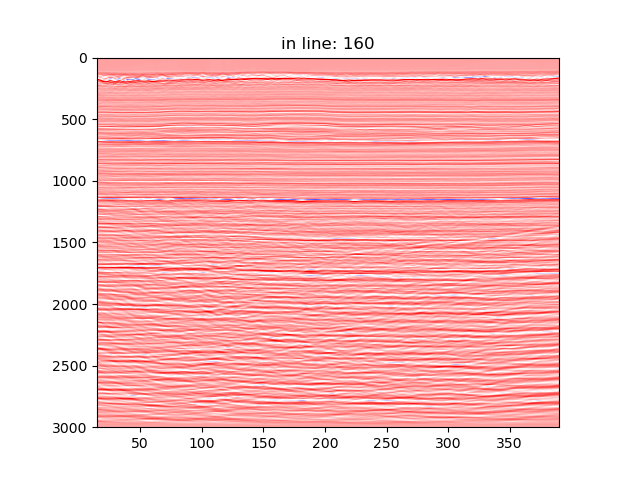

In [8]:

#v1=VBox([c_update,auto_scale])#itrace,
h1=HBox([select_realize,realizename,realizeit,savetofile])

v1=VBox([il_Slider,xl_Slider,z_Slider])
v2= VBox([colormap,vmin,vmax])
v3=VBox([showlegend,auto_scale_min,auto_scale_max])
h2=HBox([graphtype,v1,v2,v3])#v1,resizefactor

#h1 = HBox([itrace,c_update,auto_scale])
#h2= HBox([,])
h3 = HBox([attribute,att_par])#interpolation,filters,

#h5= HBox([])
#h6= HBox([realizeit,realizename])
display(h1,h2,h3)

#right_box = VBox([items[2], items[3]])
#HBox([left_box, right_box])

#display(itrace,il_Slider,xl_Slider,z_Slider,colormap,interpolation,vmin,vmax,filters)#iBP,LB,HB,
il_plot(clear=True)
tp=1
#display(xl_Slider,colormap,interpolation)
#xl_plot(src.xlines[0],colormap.value,interpolation.value,changecmap=True)
#display(z_Slider,colormap,interpolation)
#z_plot(0,colormap.value,interpolation.value,changecmap=True)

In [9]:
#print(vol.shape)
#from scipy.signal.signaltools import hilbert
#import time
#
#start_time = time.time()
#b=hilbert(vol, axis=2)
#elapsed_time = time.time() - start_time
#
#print(elapsed_time)